## Algorithm training, testing, and validation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
# load clean dataset
cleaned_df= pd.read_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/Cleaned_Casablanca_Morocco_Solcast_PT60M.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,14.654545,11.209091,67.363636,1005.754545,87.090909,1.936364,599.363636,58.454545,305.000000
1,2019-01-01,1,2019-01-01,15.000000,8.781818,66.181818,1009.609091,180.909091,1.300000,538.636364,71.272727,297.272727
2,2019-01-02,1,2019-01-02,14.045455,9.809091,73.272727,1008.954545,189.636364,1.145455,467.363636,93.545455,285.818182
3,2019-01-03,1,2019-01-03,13.509091,8.109091,72.909091,1005.318182,51.272727,2.763636,646.181818,51.727273,315.545455
4,2019-01-04,1,2019-01-04,13.836364,7.236364,70.363636,1006.436364,56.000000,2.027273,659.272727,49.545455,319.454545


In [5]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

In [6]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 'Daily_radiation']]

In [7]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [10]:
# select features
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,31,14.654545,11.209091,67.363636,1005.754545,87.090909,1.936364,599.363636,58.454545,305.000000
1,1,1,15.000000,8.781818,66.181818,1009.609091,180.909091,1.300000,538.636364,71.272727,297.272727
2,1,2,14.045455,9.809091,73.272727,1008.954545,189.636364,1.145455,467.363636,93.545455,285.818182
3,1,3,13.509091,8.109091,72.909091,1005.318182,51.272727,2.763636,646.181818,51.727273,315.545455
4,1,4,13.836364,7.236364,70.363636,1006.436364,56.000000,2.027273,659.272727,49.545455,319.454545


### Model training and testing

In [11]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(cleaned_df.sample(frac = 1), [int(.7 * len(cleaned_df)), int(.85 * len(cleaned_df))])

# convert dataframes to .csv and save locally
train_data.to_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/train.csv', header = True, index = False)
validation_data.to_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/validation.csv', header=True, index = False)
test_data.to_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/test.csv', header = True, index = False)

In [13]:
# training data
train_df = pd.read_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [14]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [16]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score: ', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score:  0.9057973461581956
Root Mean Squared Error: 35.72
Root Mean Absolute Error: 5.31


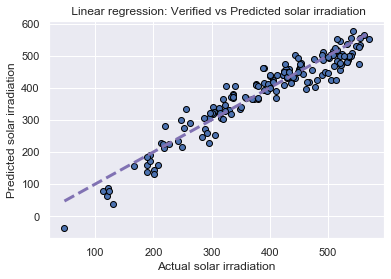

In [17]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


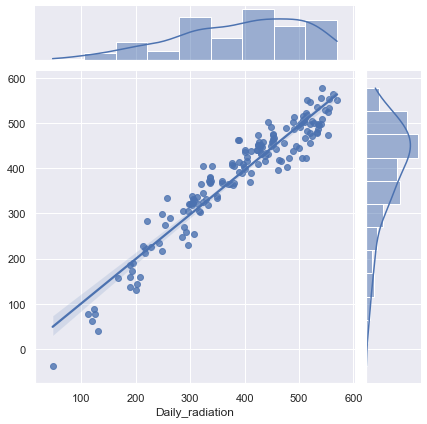

In [18]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

### Random Forest Regressor

In [19]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [20]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score: ', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score:  0.9776830935699437
Root Mean Squared Error: 17.38
Root Mean Absolute Error: 3.53


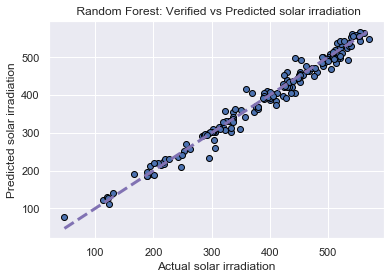

In [21]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


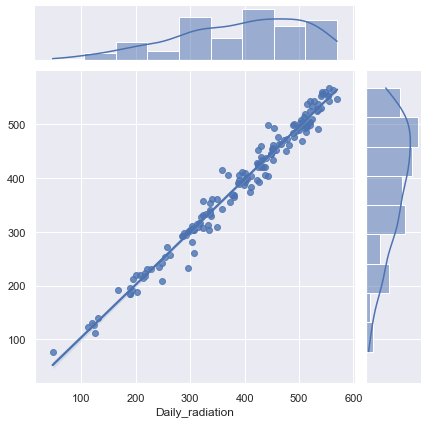

In [22]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

In [23]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [25]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score: ', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score:  0.9787794431567535
Root Mean Squared Error: 16.95
Root Mean Absolute Error: 3.57


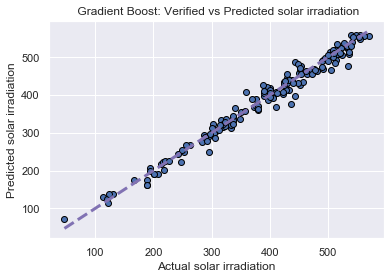

In [27]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


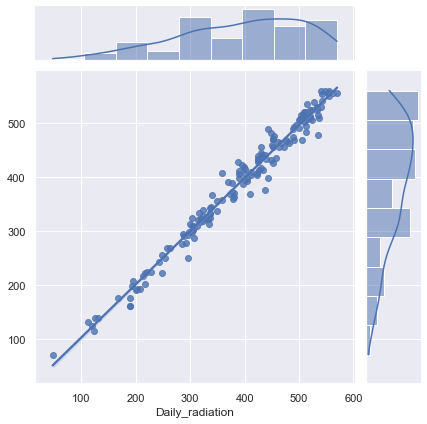

In [28]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

### Model Validation

In [30]:
# validation data
val_df = pd.read_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [31]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [32]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score:  0.8798353387459101
Linear Regression - Root Mean Squared Error: 34.83
Linear Regression - Root Mean Absolute Error: 34.83


In [33]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score: ', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score:  0.9624019468423075
Random Forest - Root Mean Squared Error: 19.48
Random Forest - Root Mean Absolute Error: 19.48


In [34]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score: ', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score:  0.9710673290033346
Gradient Boost - Root Mean Squared Error: 17.09
Gradient Boost - Root Mean Absolute Error: 3.61
